### Exercise 2

Generate 100 artificial data points $ (x_i, y_i) $ where $ x_i $ is randomly generated in the interval $[0, 1]$ and 

$$
y_i = \cos(4 \pi x_i) + \epsilon,
$$

$ \epsilon $ is a random noise in the interval $[-0.2, 0.2]$. Implement the SGD method to solve the regression problem for the data you have generated. Use an initial constant learning rate $ \eta = 0.001 $ and train a polynomial of the form 

$$
h_c = c_0 + c_1 x + c_2 x^2 + \dots + c_n x^n
$$

using your data $ n $ is the maximum degree of the polynomial. Assume that all the initial parameters $ c_i $ are randomly generated in $[-0.4, 0.4]$. 

- Try different values of $n$. 
- Try also different values for $\alpha$ to speed up the learning process. 
- Plot the various results and comment on them.


In [1]:
import numpy as np

In [5]:
0.4 * np.random.rand(100)

array([0.19463791, 0.10686055, 0.03963977, 0.12940046, 0.34257386,
       0.10429233, 0.08511821, 0.27684183, 0.30341679, 0.08237694,
       0.37848867, 0.27677205, 0.02842385, 0.38132412, 0.25307416,
       0.32700196, 0.09764947, 0.07675614, 0.2929113 , 0.12604351,
       0.21740431, 0.16840399, 0.182617  , 0.31579551, 0.10844953,
       0.13798043, 0.11099885, 0.31308668, 0.10567435, 0.04462353,
       0.36605043, 0.12904267, 0.08732922, 0.17540707, 0.2553663 ,
       0.05868099, 0.08649746, 0.38107734, 0.35760236, 0.00197037,
       0.04443791, 0.01666146, 0.06701831, 0.35439158, 0.3802118 ,
       0.31482589, 0.37026494, 0.04897971, 0.04358117, 0.3332628 ,
       0.24162663, 0.00542057, 0.00095955, 0.19115982, 0.23489156,
       0.10278025, 0.09826027, 0.16061839, 0.12971892, 0.33498316,
       0.12693567, 0.23816706, 0.30916399, 0.12125989, 0.1384008 ,
       0.16162639, 0.04368098, 0.06924105, 0.27597428, 0.20749472,
       0.28945421, 0.38616058, 0.21289971, 0.11388816, 0.01823

In [4]:
np.random.rand(100,1)

array([[0.41571949],
       [0.95369539],
       [0.82631554],
       [0.37170645],
       [0.59865445],
       [0.35492418],
       [0.19015214],
       [0.15751509],
       [0.39879456],
       [0.43645274],
       [0.79626749],
       [0.25993952],
       [0.79724814],
       [0.13355411],
       [0.79507753],
       [0.74609355],
       [0.6238042 ],
       [0.64308462],
       [0.99057245],
       [0.11118531],
       [0.73504566],
       [0.10180162],
       [0.48660505],
       [0.00848156],
       [0.76732534],
       [0.89318541],
       [0.57174103],
       [0.12893367],
       [0.58245309],
       [0.46933953],
       [0.86531317],
       [0.5914729 ],
       [0.87409103],
       [0.61686014],
       [0.70370331],
       [0.43088134],
       [0.80837338],
       [0.42207019],
       [0.5133958 ],
       [0.87442516],
       [0.71052211],
       [0.49133198],
       [0.87349917],
       [0.88039344],
       [0.35266121],
       [0.68096377],
       [0.76855636],
       [0.072

In [8]:
def get_training_data(f, a, b, n_samples, noise_range, seed=None):
    if seed is not None:
        np.random.seed(seed)  # For reproducibility
    
    # Generate random x values within the range [a, b]
    x = np.random.uniform(a, b, n_samples)
    
    # Generate random noise within the specified range
    min_noise, max_noise = noise_range
    eps = np.random.uniform(min_noise, max_noise, n_samples)
    
    # Compute y-values with added noise
    y = f(x) + eps
    
    return x, y

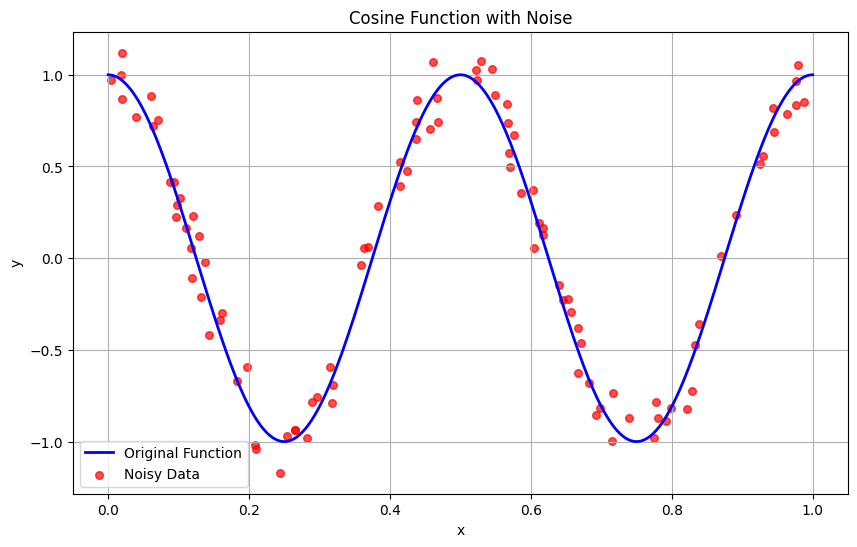

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_generated_data(x, y, f, a, b, resolution=500, title="Generated Data with Noise"):
    # Generate a smooth curve for the original function
    x_smooth = np.linspace(a, b, resolution)
    y_smooth = f(x_smooth)

    plt.figure(figsize=(10, 6))
    
    # Plot the original function
    plt.plot(x_smooth, y_smooth, label="Original Function", color="blue", linewidth=2)
    
    # Plot the noisy data points
    plt.scatter(x, y, label="Noisy Data", color="red", alpha=0.7, s=30)
    
    # Add labels, legend, and title
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Define the function
f = lambda x: np.cos(4 * np.pi * x)

# Generate data with noise
a, b = 0, 1
n_samples = 100
noise_range = (-0.2, 0.2)
x, y = get_training_data(f, a, b, n_samples, noise_range, seed=0)

# Plot the data
plot_generated_data(x, y, f, a, b, title="Cosine Function with Noise")


In [10]:
import jax
import jax.numpy as jnp

In [19]:
n_samples= 100

# Define the model function for polynomial regression
def model(params, x):
    # Horner's method for polynomial evaluation in reverse order
    # because the function polyval assumes the coefficients given in descending order
    return jnp.polyval(params[::-1], x)

def loss(x,y,params):
    preds = model(params, x)
    return jnp.mean((y - preds) ** 2)

grad_fn = jax.grad(loss, argnums=2)
grad_fn = jax.jit(grad_fn)

def sgd(x, y, grad_func, init_params, lr=0.01, alpha= 0, max_iter=1000, batch_size=1):
    params = init_params
    path = [params]  # for visualization purposes only

    velocity = [0.0 in range(len(params))]
    for _ in range(max_iter):
        batch_idx = np.random.choice(batch_size,n_samples)
        grad = grad_func(x[batch_idx], y[batch_idx] ,params)
        velocity = alpha * params + grad
        params = params - lr * velocity
        path.append(params)
        # if jnp.linalg.norm(f(params) - f(params)) < tol:
        #     break
    return params

Degree 2, alpha 0.0: [ 0.8329266   0.19617972 -0.17189968]
Degree 2, alpha 0.1: [0.61641544 0.33829483 0.18566069]
Degree 2, alpha 0.2: [0.59575635 0.3269581  0.17943898]
Degree 2, alpha 0.5: [0.54132956 0.29708886 0.16304636]
Degree 4, alpha 0.0: [0.73456764 0.14571306 0.06576202 0.15791003 0.31272623]
Degree 4, alpha 0.1: [0.6015818  0.3301539  0.18119298 0.09944174 0.05457506]
Degree 4, alpha 0.2: [0.5818892  0.31934744 0.17526224 0.09618656 0.0527885 ]
Degree 4, alpha 0.5: [0.5298561  0.2907919  0.15959054 0.08758549 0.0480681 ]
Degree 6, alpha 0.0: [ 0.54902035  0.5428005  -0.04688227  0.31213424 -0.21104552  0.38443047
  0.1621727 ]
Degree 6, alpha 0.1: [0.6002693  0.329438   0.18079872 0.09922555 0.05445594 0.02988635
 0.01640207]
Degree 6, alpha 0.2: [0.58066213 0.31867602 0.17489316 0.09598404 0.05267719 0.02891003
 0.01586623]
Degree 6, alpha 0.5: [0.528839   0.29023415 0.15928434 0.08741745 0.04797585 0.02632981
 0.01445015]
Degree 8, alpha 0.0: [ 0.42325783  0.71509236  0.3

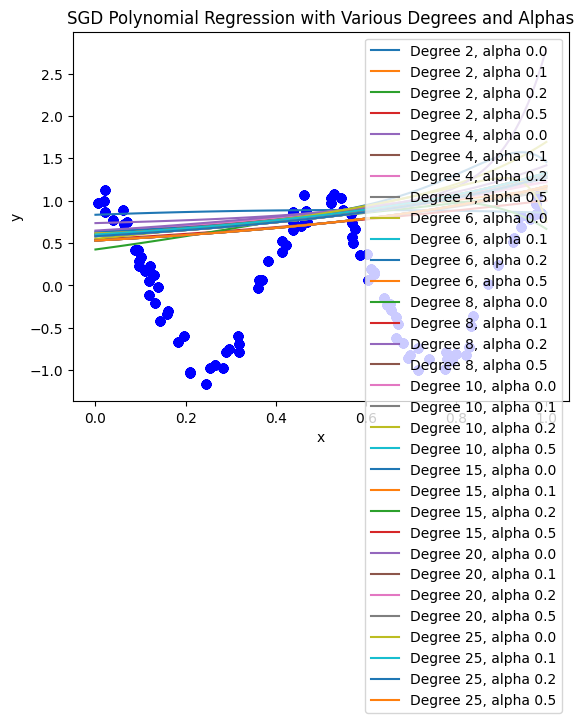

In [ ]:
degrees = [2, 4, 6, 8, 10, 15, 20, 25]  # Different degrees of the polynomial
alphas = [0.0, 0.1, 0.2, 0.5]  # Different momentum terms
results = {}

for degree in degrees:
    params = np.random.uniform(-0.4, 0.4, degree + 1)
    for alpha in alphas:
        params = sgd(x, y, grad_fn, params, lr=0.1, alpha=alpha, max_iter=10000)
        
        params = np.array(params)  # Ensure params is a NumPy array
        results[(degree, alpha)] = params

        print(f'Degree {degree}, alpha {alpha}: {params}')
        
        # Plot the data points and fitted curve
        plt.scatter(x, y, color='blue', label='Data points' if degree == 1 and alpha == 0 else "")
        curve_x = jnp.linspace(0, 1, 100)
        curve_y = jnp.polyval(params[::-1], curve_x)  # Polynomial evaluation using Horner's method
        plt.plot(curve_x, curve_y, label=f'Degree {degree}, alpha {alpha}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Polynomial Regression with Various Degrees and Alphas')
plt.legend()
plt.show()
